In [1]:
#Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    df = pd.read_csv("Schema/customer_chunk_predictoin.csv")
except FileNotFoundError as e:
    print(f"Error {e}.")

In [3]:
#Lets see tha datasets.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Lets Check the Information of this datasets.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Lets describe the Datasets Columns.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
#Lets checj there is any null values of not
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#Data Preprocessin of the Datasets.
print("Lets Start the Preprocessing of the Datasets...........")

Lets Start the Preprocessing of the Datasets...........


In [8]:
#Remove the unwanted Columns.
df.drop(columns=["customerID"], inplace=True)
print("Remove Customer_ID columns from the datasets.")

Remove Customer_ID columns from the datasets.


In [9]:
#Lets clean the All the columns.

#gender columns.
df["gender"] = df["gender"].str.lower()

#SeniorCitizen columns
# df["SeniorCitizen"]

#Partner Columns
df["Partner"] = df["Partner"].str.lower()

#Dependents columns
df["Dependents"] = df["Dependents"].str.lower()

#tenure columns
# df["tenure"] = df["tenure"].str.lower()

#PhoneService Columns
df["PhoneService"] = df["PhoneService"].str.lower()

#MultipleLines Columns.
df["MultipleLines"] = df["MultipleLines"].str.replace("phone service","")
df["MultipleLines"] = df["MultipleLines"].str.strip()
df["MultipleLines"] = df["MultipleLines"].str.lower()

#InternetService columns
df["InternetService"] = df["InternetService"].str.lower()

#OnlineSecurity Columns
df["OnlineSecurity"] = df["OnlineSecurity"].str.replace("internet service","")
df["OnlineSecurity"] = df["OnlineSecurity"].str.strip()
df["OnlineSecurity"] = df["OnlineSecurity"].str.lower()

#OnlineBackup Columns
df["OnlineBackup"] = df["OnlineBackup"].str.replace("internet service","")
df["OnlineBackup"] = df["OnlineBackup"].str.strip()
df["OnlineBackup"] = df["OnlineBackup"].str.lower()

#DeviceProtection Columns
df["DeviceProtection"] = df["DeviceProtection"].str.replace("internet service","")
df["DeviceProtection"] = df["DeviceProtection"].str.strip()
df["DeviceProtection"] = df["DeviceProtection"].str.lower()

#TechSupport columns
df["TechSupport"] = df["TechSupport"].str.replace("internet service","")
df["TechSupport"] = df["TechSupport"].str.strip()
df["TechSupport"] = df["TechSupport"].str.lower()

#StreamingTV columns
df["StreamingTV"] = df["StreamingTV"].str.replace("internet service","")
df["StreamingTV"] = df["StreamingTV"].str.strip()
df["StreamingTV"] = df["StreamingTV"].str.lower()

#StreamingMovies columns
df["StreamingMovies"] = df["StreamingMovies"].str.replace("internet service","")
df["StreamingMovies"] = df["StreamingMovies"].str.strip()
df["StreamingMovies"] = df["StreamingMovies"].str.lower()

#Contract columns
df["Contract"] = df["Contract"].str.replace("-to-month","")
df["Contract"] = df["Contract"].str.lower()
df["Contract"] = df["Contract"].str.strip()

#PaperlessBilling columns
df["PaperlessBilling"] = df["PaperlessBilling"].str.lower()
df["PaperlessBilling"] = df["PaperlessBilling"].str.strip()

#PaymentMethod columns
df["PaymentMethod"] = df["PaymentMethod"].str.replace("check","")
df["PaymentMethod"] = df["PaymentMethod"].str.replace("(automatic)","")
df["PaymentMethod"] = df["PaymentMethod"].str.strip()
df["PaymentMethod"] = df["PaymentMethod"].str.lower()

#MonthlyCharges columns

#TotalCharges columns
df["TotalCharges"] = df["TotalCharges"].str.strip()
df["TotalCharges"] = df["TotalCharges"].replace("",np.nan)
df["TotalCharges"] = df["TotalCharges"].astype("float32")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

#Churn columns
df["Churn"] = df["Churn"].str.lower()

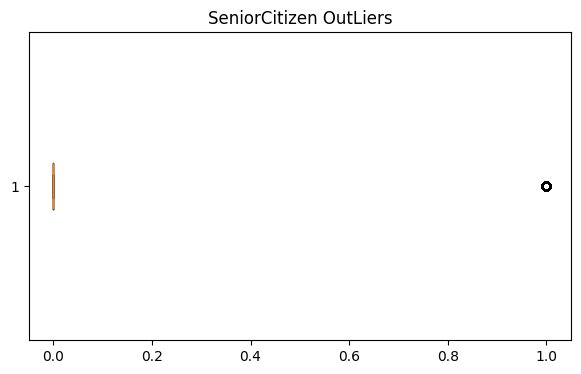

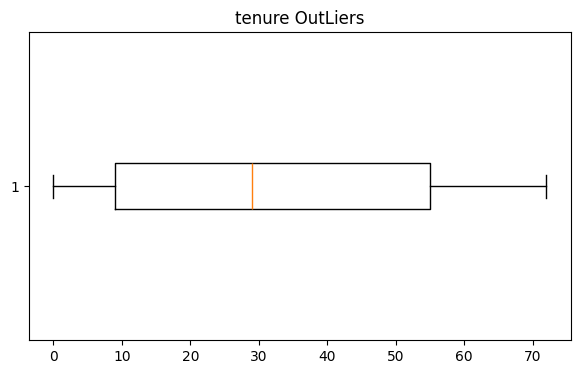

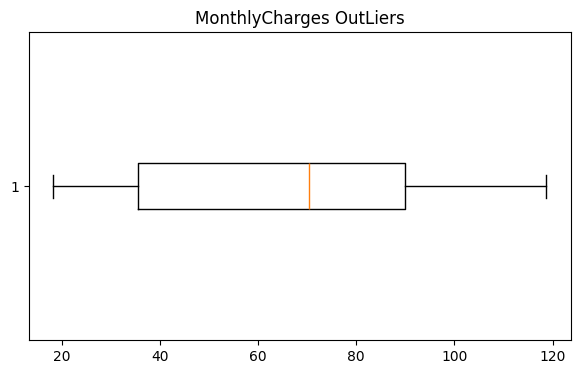

In [10]:
#Lets check there is any outliers or not. 

l1 = ["SeniorCitizen","tenure","MonthlyCharges"]

for i in l1:
    plt.figure(figsize=(7,4))
    plt.boxplot(df[i],vert=False)
    plt.title(f"{i} OutLiers")
    plt.show()

In [11]:
#Lets Save the Updated Dataset Files.
df.to_csv("Schema/Cleaned_data_of_chunk.csv")